# <机器学习>课程 Lecture4 实验

## 特征降维

给定一组高维数据,将高维数据降维之后,完成二分类任务,并可视化.

### 主成分分析

首先加载一组高维数据,使用PCA降维,并比较不同维度的区分能力.


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

data_filename = 'cls_data_4dim.npy'
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)


使用sklearn中提供的PCA降维,结合分类器分类.
观察不同维度特征的分类性能.

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca_model = PCA(n_components=4)
x_train_pca = pca_model.fit_transform(x_train)

model = LogisticRegression()

model.fit(x_train, y_train)
print((y_test == model.predict(x_test)).mean())

model.fit(x_train_pca[:, :2], y_train)
print((y_test == model.predict(pca_model.transform(x_test)[:, :2])).mean())

model.fit(x_train_pca[:, 2:], y_train)
print((y_test == model.predict(pca_model.transform(x_test)[:, 2:])).mean())



0.95
0.95
0.65


可视化不同维度的特征的区分能力.

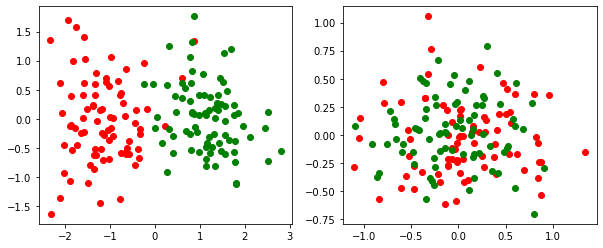

In [11]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(x_train_pca[y_train==1, 0], x_train_pca[y_train==1, 1], c='red')
ax1.scatter(x_train_pca[y_train==0, 0], x_train_pca[y_train==0, 1], c='green')

ax2.scatter(x_train_pca[y_train==1, 2], x_train_pca[y_train==1, 3], c='red')
ax2.scatter(x_train_pca[y_train==0, 2], x_train_pca[y_train==0, 3], c='green')

plt.show()


### Fisher's LDA

首先加载一组高维数据,使用LDA降维,并比较不同维度的区分能力.


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

data_filename = 'cls_data_4dim.npy'
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)


使用skleanr中提供的LDA降维,结合分类器进行分类.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda_model = LDA(n_components=1)
x_train_lda = lda_model.fit_transform(x_train, y_train)

model = LogisticRegression()

model.fit(x_train, y_train)
print((y_test == model.predict(x_test)).mean())

model.fit(x_train_lda, y_train)
print((y_test == model.predict(lda_model.transform(x_test))).mean())


1.0
1.0


加载一组高维数据,使用不同的降维方法降维,并比较降维之后分类的效果并分析.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

data_filename = 'cls_data_lda.npy'
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)


0.6875
1.0


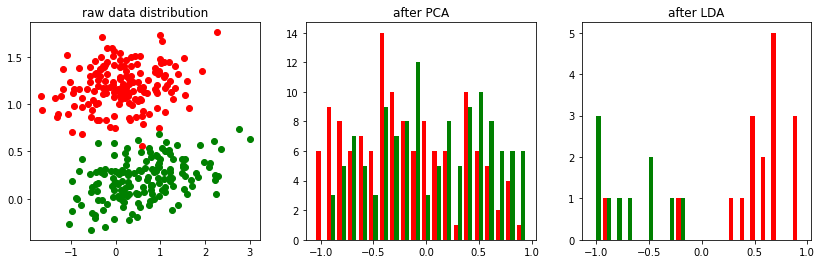

In [15]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_model = PCA(n_components=1)
x_train_pca = pca_model.fit_transform(x_train)

lda_model = LDA(n_components=1)
x_train_lda = lda_model.fit_transform(x_train, y_train)

model = LogisticRegression()

model.fit(x_train_pca, y_train)
print((y_test == model.predict(pca_model.transform(x_test))).mean())

model.fit(x_train_lda, y_train)
print((y_test == model.predict(lda_model.transform(x_test))).mean())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='red')
ax1.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='green')
ax1.set_title("raw data distribution")

bins = np.array([val/10 for val in range(-10, 11)])
x_train_pca_hist_pos, _ = np.histogram(x_train_pca[y_train==1], bins)
x_train_pca_hist_neg, _ = np.histogram(x_train_pca[y_train==0], bins)
ax2.bar(bins[:-1] - 0.02, x_train_pca_hist_pos, width=0.04, color='red')
ax2.bar(bins[:-1] + 0.02, x_train_pca_hist_neg, width=0.04, color='green')
ax2.set_title("after PCA")

bins = np.array([val/10 for val in range(-10, 11)])
x_train_lda_hist_pos, _ = np.histogram(x_train_lda[y_train==1], bins)
x_train_lda_hist_neg, _ = np.histogram(x_train_lda[y_train==0], bins)
ax3.bar(bins[:-1] - 0.02, x_train_lda_hist_pos, width=0.04, color='red')
ax3.bar(bins[:-1] + 0.02, x_train_lda_hist_neg, width=0.04, color='green')
ax3.set_title("after LDA")

plt.show()


加载另一组数据,使用不同的方式降维,比较降维之后的效果.

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

data_filename = 'cls_data_lda_hard.npy'
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)


0.5125
0.525


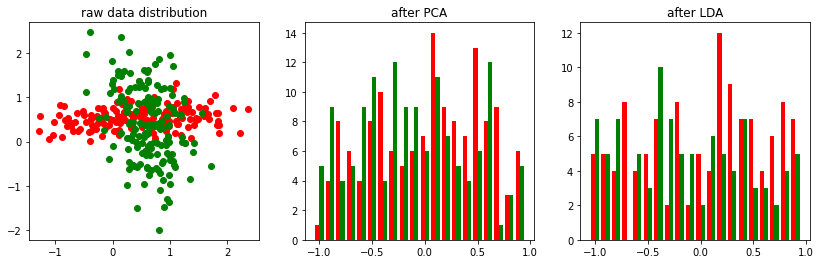

In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca_model = PCA(n_components=1)
x_train_pca = pca_model.fit_transform(x_train)

lda_model = LDA(n_components=1)
x_train_lda = lda_model.fit_transform(x_train, y_train)

model = LogisticRegression()

model.fit(x_train_pca, y_train)
print((y_test == model.predict(pca_model.transform(x_test))).mean())

model.fit(x_train_lda, y_train)
print((y_test == model.predict(lda_model.transform(x_test))).mean())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.scatter(x_train[y_train==1, 0], x_train[y_train==1, 1], c='red')
ax1.scatter(x_train[y_train==0, 0], x_train[y_train==0, 1], c='green')
ax1.set_title("raw data distribution")

bins = np.array([val/10 for val in range(-10, 11)])
x_train_pca_hist_pos, _ = np.histogram(x_train_pca[y_train==1], bins)
x_train_pca_hist_neg, _ = np.histogram(x_train_pca[y_train==0], bins)
ax2.bar(bins[:-1] - 0.02, x_train_pca_hist_pos, width=0.04, color='red')
ax2.bar(bins[:-1] + 0.02, x_train_pca_hist_neg, width=0.04, color='green')
ax2.set_title("after PCA")

bins = np.array([val/10 for val in range(-10, 11)])
x_train_lda_hist_pos, _ = np.histogram(x_train_lda[y_train==1], bins)
x_train_lda_hist_neg, _ = np.histogram(x_train_lda[y_train==0], bins)
ax3.bar(bins[:-1] - 0.02, x_train_lda_hist_pos, width=0.04, color='red')
ax3.bar(bins[:-1] + 0.02, x_train_lda_hist_neg, width=0.04, color='green')
ax3.set_title("after LDA")

plt.show()